### Imports

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

from scipy.optimize import curve_fit
import statsmodels.api as sm
import math

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns',None)

### read_csv

El .csv es demasiado pesado, el completo 1.5 GB, el simplificado 400MB los he sacado del repo para no subirlos a github

In [2]:
#data = pd.read_csv('final_data.csv')


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nos quedamos con los vuelos de 2016 para los seis aeropuertos con mas vuelos y creamos un csv

In [3]:
#data.columns = map(str.lower, data.columns)
#lista = ['ATL','ORD','DEN','LAX','DFW','SFO']
#data = data[data['origin'].isin(lista)]
#data.to_csv('data_6_airports.csv')

Hacemos un read_csv con una muestra de 50k de vuelos para esos 6 aeropuertos

In [4]:
df = pd.read_csv('data_6_airports.csv').sample(50000)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (37,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Analysis - Data Cleaning

In [5]:
data=df

Analizamos el dataset

In [6]:
data.columns

Index(['Unnamed: 0', 'year', 'quarter', 'month', 'day_of_month', 'day_of_week',
       'fl_date', 'unique_carrier', 'airline_id', 'carrier', 'tail_num',
       'fl_num', 'origin_airport_id', 'origin_airport_seq_id',
       'origin_city_market_id', 'origin', 'origin_city_name',
       'origin_state_abr', 'origin_state_fips', 'origin_state_nm',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_wac', 'crs_dep_time',
       'dep_time', 'dep_delay', 'dep_delay_new', 'dep_del15',
       'dep_delay_group', 'dep_time_blk', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_d

In [7]:
data.head()

,Unnamed: 0,year,quarter,month,day_of_month,day_of_week,fl_date,unique_carrier,airline_id,carrier,tail_num,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,origin_state_abr,origin_state_fips,origin_state_nm,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,unnamed: 64
50430,196815,2016,1,1,19,2,2016-01-19,UA,19977,UA,N26210,277,11292.0,1129202,30325,DEN,"Denver, CO",CO,8.0,Colorado,82.0,14771.0,1477102.0,32457.0,SFO,"San Francisco, CA",CA,6.0,California,91.0,755.0,1014.0,139.0,139.0,1.0,9.0,0700-0759,87,1141.0,1304.0,11.0,952.0,1315.0,203.0,203.0,1.0,12.0,0900-0959,0.0,NaN,0.0,177.0,241.0,143.0,1.0,967.0,4.0,0.0,0.0,203.0,0.0,0.0,NaN,NaN,NaN,NaN
1172065,4551258,2016,4,10,19,3,2016-10-19,AA,19805,AA,N3FYAA,2385,11298.0,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74.0,14683.0,1468303.0,33214.0,SAT,"San Antonio, TX",TX,48.0,Texas,74.0,1805.0,1806.0,1.0,1.0,0.0,0.0,1800-1859,10,1816.0,1855.0,3.0,1909.0,1858.0,-11.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,64.0,52.0,39.0,1.0,247.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90359,318178,2016,1,1,28,4,2016-01-28,EV,20366,EV,N754EV,5034,10397.0,1039705,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34.0,15607.0,1560702.0,35550.0,VLD,"Valdosta, GA",GA,13.0,Georgia,34.0,1026.0,1133.0,67.0,67.0,1.0,4.0,1000-1059,14,1147.0,1232.0,3.0,1128.0,1235.0,67.0,67.0,1.0,4.0,1100-1159,0.0,NaN,0.0,62.0,62.0,45.0,1.0,208.0,1.0,67.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
979280,3797654,2016,3,9,16,5,2016-09-16,AA,19805,AA,N3CFAA,138,11298.0,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74.0,12953.0,1295302.0,31703.0,LGA,"New York, NY",NY,36.0,New York,22.0,1747.0,1745.0,-2.0,0.0,0.0,-1.0,1700-1759,27,1812.0,2211.0,12.0,2213.0,2223.0,10.0,10.0,0.0,0.0,2200-2259,0.0,NaN,0.0,206.0,218.0,179.0,1.0,1389.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187923,713334,2016,1,2,25,4,2016-02-25,DL,19790,DL,N935AT,1640,10397.0,1039705,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34.0,11641.0,1164102.0,31641.0,FAY,"Fayetteville, NC",NC,37.0,North Carolina,36.0,1339.0,1338.0,-1.0,0.0,0.0,-1.0,1300-1359,12,1350.0,1437.0,4.0,1451.0,1441.0,-10.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,72.0,63.0,47.0,1.0,331.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos las columnas que la mayoria de sus valores son nulos

In [8]:
null_cols = data.isnull().sum()/len(data)
drop_col = null_cols[null_cols>0.7].sort_values(ascending=False)
drop_col

unnamed: 64            1.00000
longest_add_gtime      0.99416
total_add_gtime        0.99416
first_dep_time         0.99416
cancellation_code      0.98802
late_aircraft_delay    0.81076
security_delay         0.81076
nas_delay              0.81076
weather_delay          0.81076
carrier_delay          0.81076
dtype: float64

In [9]:
data = data.drop(columns=list(drop_col.index))

### Categorical Data Visualisation

Procedemos a realizar algunas visualizaciones de los datos para endender su distribucion

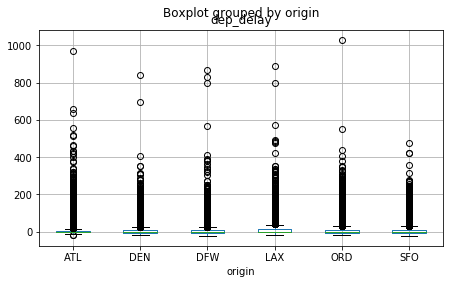

In [10]:
#sacar los outliers
_= data.boxplot(column='dep_delay', by='origin')

A primera vista podriamos decir que todos los aeropuertos tienen un comportamiento parecido. El grafico no permite visualizar muy bien los datos

Por ese motivo hacemos un boxplot de un aeropuerto en particular para ver con mayor detalle

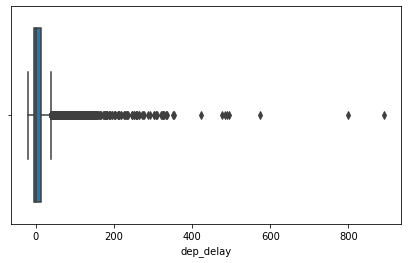

In [11]:
x = data[data['origin']=='LAX']
sns.boxplot(x='dep_delay', data = x)
plt.show()

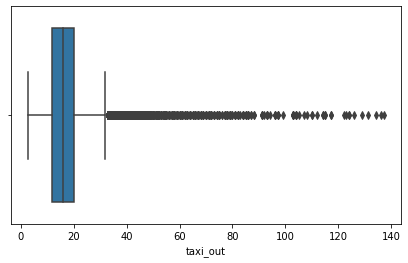

In [13]:
data['taxi_out'] = data['taxi_out'].astype('float')
sns.boxplot(x='taxi_out', data = data)
plt.show()

In [14]:
print(data['dep_delay'][data['origin']=='LAX'].quantile(.05))
print(data['dep_delay'][data['origin']=='LAX'].quantile(.9))

-8.0
40.0


Podemos observar que el 85% de los vuelos se encuenta entre -8min y un retraso de 41min

Hacos algunos graficos muy simples para entender mejor nuestros datos

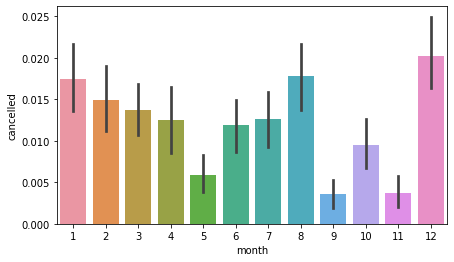

In [15]:
sns.barplot(x='month',y='cancelled', data=data)

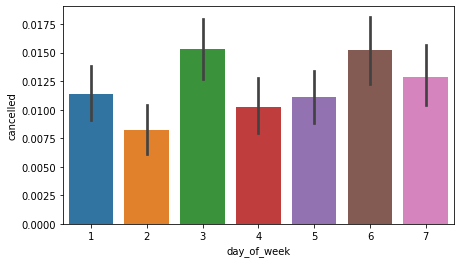

In [16]:
sns.barplot(x='day_of_week',y='cancelled', data=data)

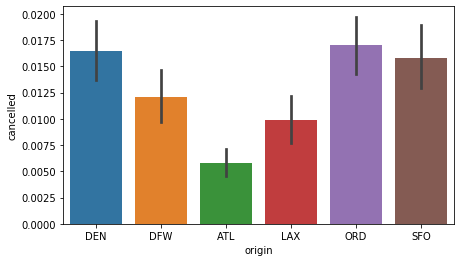

In [17]:
sns.barplot(x='origin',y='cancelled', data=data)

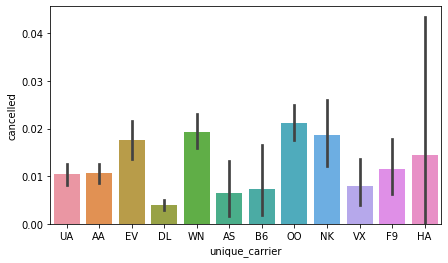

In [18]:
sns.barplot(x='unique_carrier',y='cancelled', data=data)

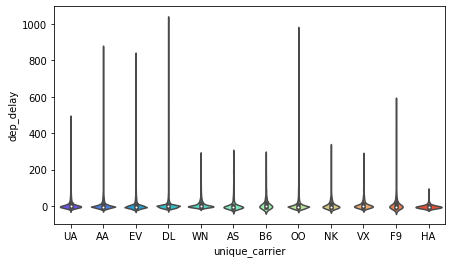

In [19]:
sns.violinplot(x="unique_carrier", y="dep_delay", data=data,palette='rainbow')

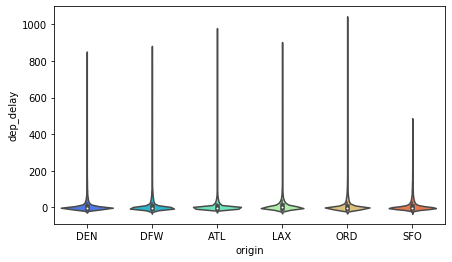

In [20]:
sns.violinplot(x="origin", y="dep_delay", data=data,palette='rainbow')

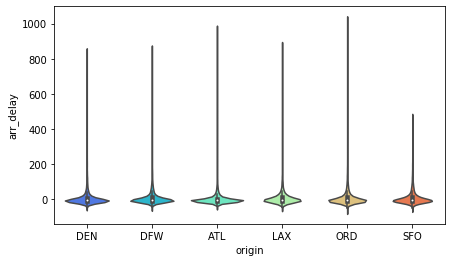

In [21]:
sns.violinplot(x="origin", y="arr_delay", data=data,palette='rainbow')

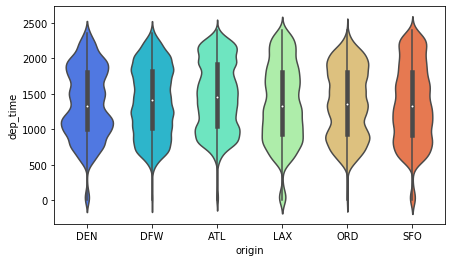

In [22]:
sns.violinplot(x="origin", y="dep_time", data=data,palette='rainbow')

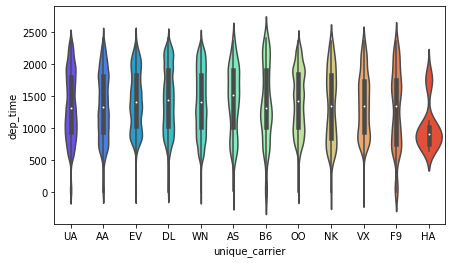

In [23]:
sns.violinplot(x="unique_carrier", y="dep_time", data=data,palette='rainbow')

### Correlaciones and Describe

In [24]:
data = data.drop(columns = ['Unnamed: 0','quarter',
                        'carrier','tail_num','fl_num',
                        'origin_airport_id','origin_airport_seq_id',
                        'origin_city_market_id','origin_state_fips',
                       'origin_wac','dest_airport_id','dest_airport_seq_id',
                        'dest_city_market_id','dest_state_fips','dest_wac','dep_del15'])

In [25]:
data.head()

,year,month,day_of_month,day_of_week,fl_date,unique_carrier,airline_id,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group
50430,2016,1,19,2,2016-01-19,UA,19977,DEN,"Denver, CO",CO,Colorado,SFO,"San Francisco, CA",CA,California,755.0,1014.0,139.0,139.0,9.0,0700-0759,87.0,1141.0,1304.0,11.0,952.0,1315.0,203.0,203.0,1.0,12.0,0900-0959,0.0,0.0,177.0,241.0,143.0,1.0,967.0,4.0
1172065,2016,10,19,3,2016-10-19,AA,19805,DFW,"Dallas/Fort Worth, TX",TX,Texas,SAT,"San Antonio, TX",TX,Texas,1805.0,1806.0,1.0,1.0,0.0,1800-1859,10.0,1816.0,1855.0,3.0,1909.0,1858.0,-11.0,0.0,0.0,-1.0,1900-1959,0.0,0.0,64.0,52.0,39.0,1.0,247.0,1.0
90359,2016,1,28,4,2016-01-28,EV,20366,ATL,"Atlanta, GA",GA,Georgia,VLD,"Valdosta, GA",GA,Georgia,1026.0,1133.0,67.0,67.0,4.0,1000-1059,14.0,1147.0,1232.0,3.0,1128.0,1235.0,67.0,67.0,1.0,4.0,1100-1159,0.0,0.0,62.0,62.0,45.0,1.0,208.0,1.0
979280,2016,9,16,5,2016-09-16,AA,19805,DFW,"Dallas/Fort Worth, TX",TX,Texas,LGA,"New York, NY",NY,New York,1747.0,1745.0,-2.0,0.0,-1.0,1700-1759,27.0,1812.0,2211.0,12.0,2213.0,2223.0,10.0,10.0,0.0,0.0,2200-2259,0.0,0.0,206.0,218.0,179.0,1.0,1389.0,6.0
187923,2016,2,25,4,2016-02-25,DL,19790,ATL,"Atlanta, GA",GA,Georgia,FAY,"Fayetteville, NC",NC,North Carolina,1339.0,1338.0,-1.0,0.0,-1.0,1300-1359,12.0,1350.0,1437.0,4.0,1451.0,1441.0,-10.0,0.0,0.0,-1.0,1400-1459,0.0,0.0,72.0,63.0,47.0,1.0,331.0,2.0


In [26]:
data.describe()[['dep_delay','dep_delay_new','dep_delay_group','taxi_out',
                 'taxi_in','arr_delay','arr_delay_new','actual_elapsed_time','air_time','distance']]

,dep_delay,dep_delay_new,dep_delay_group,taxi_out,taxi_in,arr_delay,arr_delay_new,actual_elapsed_time,air_time,distance
count,49423.000000,49423.000000,49423.000000,49407.000000,49376.000000,49292.000000,49292.000000,49292.000000,49292.000000,50000.00000
mean,10.267102,12.663315,0.082451,17.524642,6.894321,4.661203,12.372292,143.412846,119.002597,896.64028
std,36.600215,35.645454,2.102234,8.188564,5.486109,38.710807,35.126807,75.928273,74.105125,645.79874
min,-23.000000,0.000000,-2.000000,3.000000,1.000000,-71.000000,0.000000,27.000000,13.000000,67.00000
25%,-4.000000,0.000000,-1.000000,12.000000,4.000000,-13.000000,0.000000,87.000000,63.000000,414.00000
50%,-1.000000,0.000000,-1.000000,16.000000,6.000000,-5.000000,0.000000,123.000000,98.000000,707.00000
75%,8.000000,8.000000,0.000000,20.000000,8.000000,8.000000,8.000000,180.000000,154.000000,1199.00000
max,1031.000000,1031.000000,12.000000,137.000000,159.000000,1028.000000,1028.000000,610.000000,590.000000,4502.00000


In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)

newdf.head()

,year,month,day_of_month,day_of_week,airline_id,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_delay_group,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group
50430,2016,1,19,2,19977,755.0,1014.0,139.0,139.0,9.0,87.0,1141.0,1304.0,11.0,952.0,1315.0,203.0,203.0,1.0,12.0,0.0,0.0,177.0,241.0,143.0,1.0,967.0,4.0
1172065,2016,10,19,3,19805,1805.0,1806.0,1.0,1.0,0.0,10.0,1816.0,1855.0,3.0,1909.0,1858.0,-11.0,0.0,0.0,-1.0,0.0,0.0,64.0,52.0,39.0,1.0,247.0,1.0
90359,2016,1,28,4,20366,1026.0,1133.0,67.0,67.0,4.0,14.0,1147.0,1232.0,3.0,1128.0,1235.0,67.0,67.0,1.0,4.0,0.0,0.0,62.0,62.0,45.0,1.0,208.0,1.0
979280,2016,9,16,5,19805,1747.0,1745.0,-2.0,0.0,-1.0,27.0,1812.0,2211.0,12.0,2213.0,2223.0,10.0,10.0,0.0,0.0,0.0,0.0,206.0,218.0,179.0,1.0,1389.0,6.0
187923,2016,2,25,4,19790,1339.0,1338.0,-1.0,0.0,-1.0,12.0,1350.0,1437.0,4.0,1451.0,1441.0,-10.0,0.0,0.0,-1.0,0.0,0.0,72.0,63.0,47.0,1.0,331.0,2.0


In [28]:
newdf.shape

(50000, 28)

### Heatmap correlations

In [29]:
corr = newdf.corr().abs()

In [30]:
#corr = corr[(corr >0.2)&(corr <1)]

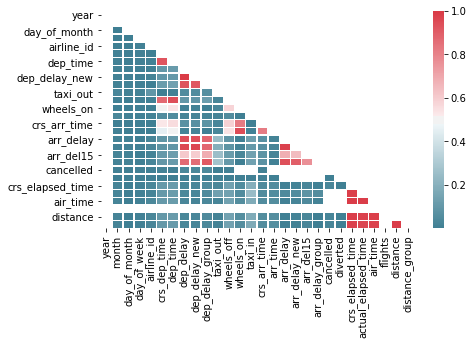

In [31]:
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            mask = np.triu(np.ones_like(corr, dtype=np.bool)),linecolor = 'white',linewidths = 0.4)


### Visualizacion Distribuciones Continuas

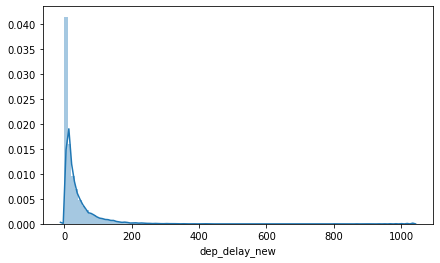

In [32]:
sns.distplot(data['dep_delay_new'][data['dep_delay_new'].astype(float)>0],bins=100)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [33]:
#import statsmodels.api as sm
#X, Y = sm.add_constant(x),y
#mod = sm.GLM(X,Y, family = sm.families.Gaussian(link=sm.families.links.log))
#res = mod.fit()

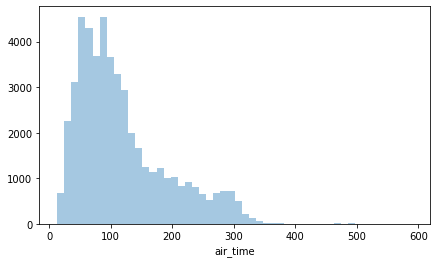

In [34]:
sns.distplot(df['air_time'].astype(float),kde=False)

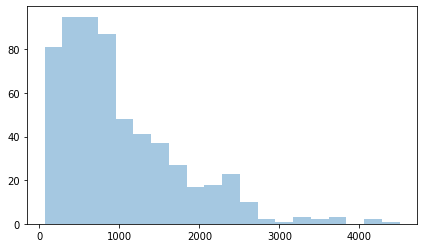

In [35]:
sns.distplot(data['distance'].unique().astype(float),kde=False)

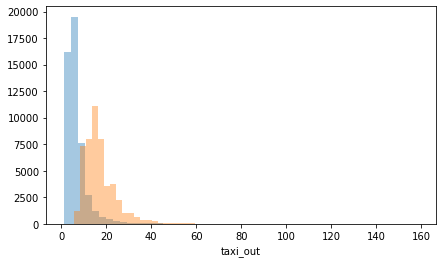

In [36]:
sns.distplot(data['taxi_in'].astype(float),kde=False)
sns.distplot(data['taxi_out'].astype(float),kde=False)

### Regression fitting

#### Air time vs distance

In [37]:
data = data.fillna(0)


In [38]:
x = data['distance']
y = data['air_time']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
x_1 = np.linspace(1,5000,100)
y_2 = intercept + slope * x_1

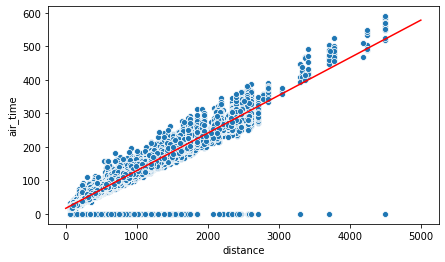

In [39]:
sns.scatterplot(x='distance',y='air_time',data = data)
plt.plot(x_1, y_2, c='red')

#### Velocity vs distance

In [40]:
data['vel'] = data['distance']/(data['air_time']/60)

In [46]:
data = data[data['air_time']>0]

In [47]:
print(np.isnan(data['vel']).any())
print(np.isnan(data['distance']).any())

False
False


In [48]:
def func_exp(x, a, b):
    return a * np.exp(b * x)

In [50]:
x= data['distance']
y = data['vel']

In [51]:
model = sm.OLS(x,y).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               distance   R-squared (uncentered):                   0.754
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                          1.512e+05
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:42:05   Log-Likelihood:                     -3.8087e+05
No. Observations:               49292   AIC:                                  7.617e+05
Df Residuals:                   49291   BIC:                                  7.617e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-2.70964161e+02, -2.24126916e-03, 4.93367552e+02))
    print(popt)
    g =sns.scatterplot(x='distance',y='vel',data = data, hue = 'unique_carrier')
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='red', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    g.legend(loc='upper left', bbox_to_anchor=(1.25, 0.5), ncol=3,frameon=False)
    plt.show()
    return #func_exp(x_data, *popt)



[-2.71425703e+02 -2.20318378e-03  4.94603951e+02]


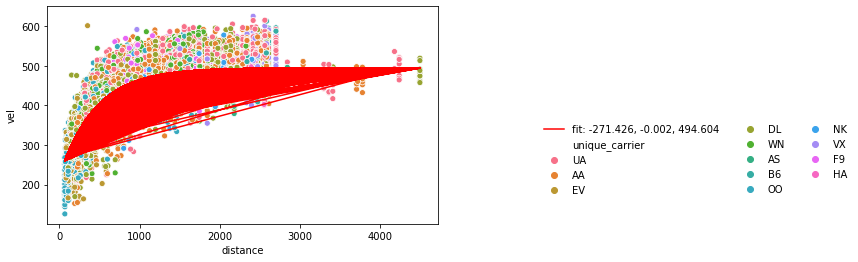

In [54]:
x_data = x
y_data = y
exponential_regression(x_data, y_data)

### Statistics

In [55]:
def q25(x):
    return x.quantile(0.25)

def q50(x):
    return x.quantile(0.5)

def q75(x):
    return x.quantile(0.75)

def q90(x):
    return x.quantile(0.9)

#### Statistics per Airport

In [56]:
airports = data.groupby(['origin']).agg({'airline_id':'count',
                                         'distance':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'air_time':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'dep_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                                 'arr_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90]})
airports

airline_id     distance                                             \
            count         mean         std  median    q25     q50     q75   
origin                                                                      
ATL         13595   644.243987  472.245640   547.0  356.0   547.0   743.0   
DEN          7518   887.793163  408.009404   862.0  628.0   862.0  1024.0   
DFW          6708   865.660107  472.862544   868.0  550.0   868.0  1188.0   
LAX          7316  1278.081192  855.291161  1235.0  370.0  1235.0  2125.0   
ORD          8238   817.764263  530.807294   719.0  416.0   719.0  1012.0   
SFO          5917  1175.501099  891.395962   679.0  372.0   679.0  2079.0   

                  air_time                                               \
           q90        mean        std median   q25    q50    q75    q90   
origin                                                                    
ATL     1199.0   92.373446  59.771178   80.0  56.0   80.0  104.0  171.0   
DEN     1506.0  116.055068  45.601812  114.0  86.0  114.0  140.0  177.0   
DFW     1391.0  116.829308  58.223967  117.0  75.0  117.0  152.0  186.0   
LAX     2475.0  158.402679  95.236112  151.0  58.0  151.0  245.0  292.0   
ORD     1726.0  113.717893  67.238264   96.0  66.0   96.0  143.0  229.0   
SFO     2565.0  145.037012  96.270515   95.0  62.0   95.0  237.0  293.0   

       dep_delay_new                                         arr_delay_new  \
                mean        std median  q25  q50   q75   q90          mean   
origin                                                                       
ATL         9.943582  32.184097    0.0  0.0  0.0   5.0  28.0      9.375726   
DEN        11.706039  32.841560    0.0  0.0  0.0   7.0  35.0     11.356212   
DFW        13.190966  38.111492    0.0  0.0  0.0   7.0  43.0     13.820662   
LAX        14.523920  38.700375    0.0  0.0  0.0  13.0  40.0     14.099508   
ORD        14.566278  38.653011    0.0  0.0  0.0   9.0  46.0     14.372178   
SFO        14.281393  34.644365    0.0  0.0  0.0  10.0  47.0     13.986311   

                                                
              std median  q25  q50   q75   q90  
origin                                          
ATL     31.507489    0.0  0.0  0.0   3.0  26.0  
DEN     32.873071    0.0  0.0  0.0   7.0  34.0  
DFW     38.141957    0.0  0.0  0.0  10.0  44.0  
LAX     38.059236    0.0  0.0  0.0  12.0  40.0  
ORD     38.110137    0.0  0.0  0.0  10.0  44.0  
SFO     33.580008    0.0  0.0  0.0  11.0  45.0

#### Statistics per Airline

In [57]:
airlines = data.groupby(['unique_carrier']).agg({'airline_id':'count',
                                         'distance':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'air_time':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'dep_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                                 'arr_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90]})
airlines

airline_id     distance                                      \
                    count         mean         std  median     q25     q50   
unique_carrier                                                               
AA                   9529  1115.059293  622.981537  1017.0   651.0  1017.0   
AS                    604  1109.632450  570.454764   954.0   679.0   954.0   
B6                    537  1889.074488  834.088345  2475.0   867.0  2475.0   
DL                  11560   799.484343  624.984389   591.0   373.0   591.0   
EV                   4458   396.106999  215.128567   363.0   208.0   363.0   
F9                   1273  1058.696779  428.536642   967.0   762.0   967.0   
HA                     68  2513.058824   84.767968  2556.0  2486.0  2556.0   
NK                   1361  1017.343865  489.792666   907.0   641.0   907.0   
OO                   5577   530.862471  369.134123   451.0   250.0   451.0   
UA                   7426  1199.034473  718.340469   925.0   641.0   925.0   
VX                   1244  1336.475884  937.807136   967.0   414.0   967.0   
WN                   5655   801.772414  458.141505   677.0   425.0   677.0   

                                  air_time                                    \
                   q75     q90        mean         std median     q25    q50   
unique_carrier                                                                 
AA              1440.0  1946.0  144.867562   72.172961  133.0   92.00  133.0   
AS              1616.0  2179.0  152.200331   71.980797  129.0   99.00  129.0   
B6              2584.0  2611.0  223.435754   90.709496  276.0  116.00  276.0   
DL               903.0  1946.0  108.355277   72.915882   85.0   59.00   85.0   
EV               552.0   717.0   61.437192   27.170313   57.0   38.00   57.0   
F9              1370.0  1635.0  136.937156   49.510314  127.0   99.00  127.0   
HA              2556.0  2615.0  322.720588   21.285441  319.0  309.75  319.0   
NK              1303.0  1744.0  133.965467   57.191509  123.0   90.00  123.0   
OO               748.0  1041.0   78.279003   45.919019   69.0   43.00   69.0   
UA              1739.0  2419.0  150.932804   80.843361  125.0   88.00  125.0   
VX              2442.0  2578.3  165.073151  103.026777  148.0   61.00  148.0   
WN               967.0  1558.0  107.110875   51.371900   95.0   64.00   95.0   

                              dep_delay_new                                    \
                   q75    q90          mean        std median  q25  q50   q75   
unique_carrier                                                                  
AA              186.00  249.0     13.067688  36.352264    0.0  0.0  0.0   8.0   
AS              210.50  264.7      8.642384  28.534311    0.0  0.0  0.0   1.0   
B6              296.00  306.0     18.607076  40.751524    0.0  0.0  0.0  16.0   
DL              123.00  234.0      9.947145  35.110320    0.0  0.0  0.0   5.0   
EV               83.00  100.0     11.996411  36.325628    0.0  0.0  0.0   4.0   
F9              169.00  208.0     17.883739  46.234625    0.0  0.0  0.0  15.0   
HA              335.25  352.3      3.897059  12.993844    0.0  0.0  0.0   0.0   
NK              165.00  224.0     14.081558  34.277457    0.0  0.0  0.0  12.0   
OO              103.00  144.0     12.760803  36.987257    0.0  0.0  0.0   6.0   
UA              209.00  278.0     15.104632  37.959329    0.0  0.0  0.0  10.0   
VX              277.00  301.0     13.944534  32.725450    0.0  0.0  0.0  10.0   
WN              131.00  184.0     12.617330  27.181620    0.0  0.0  0.0  13.0   

                     arr_delay_new                                           
                 q90          mean        std median  q25  q50    q75   q90  
unique_carrier                                                               
AA              42.0     13.746773  36.521580    0.0  0.0  0.0  11.00  43.0  
AS              22.7      9.811258  28.689811    0.0  0.0  0.0   6.00  27.1  
B6              54.2     18.636872  4

#### Statistics per month

In [58]:
month = data.groupby(['month']).agg({'airline_id':'count',
                                         'distance':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'air_time':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'dep_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                                 'arr_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90]})
month

airline_id    distance                                            \
           count        mean         std median     q25    q50     q75   
month                                                                    
1           3760  880.046011  633.076005  692.0  414.00  692.0  1182.5   
2           3678  870.885264  641.303592  679.0  404.00  679.0  1162.0   
3           4892  850.767580  626.936467  653.0  394.75  653.0  1120.0   
4           3487  884.638658  630.608201  723.0  413.50  723.0  1197.0   
5           4189  895.794939  648.771731  689.0  413.00  689.0  1199.0   
6           4204  920.335395  654.593084  731.0  425.00  731.0  1212.0   
7           4456  940.370287  662.522767  748.0  432.00  748.0  1303.0   
8           4303  926.025564  663.963865  731.0  421.00  731.0  1235.0   
9           4147  895.056909  646.336605  693.0  407.50  693.0  1201.0   
10          4249  880.139327  626.508731  692.0  414.00  692.0  1171.0   
11          3975  896.391447  645.610187  696.0  404.00  696.0  1199.0   
12          3952  939.371711  668.963272  746.0  432.00  746.0  1246.0   

                 air_time                                                \
          q90        mean        std median    q25    q50    q75    q90   
month                                                                     
1      1846.0  117.308511  73.481677   96.0  63.00   96.0  147.0  234.0   
2      1839.0  115.564165  73.851615   95.0  61.00   95.0  147.0  231.0   
3      1747.0  114.045993  72.330099   93.0  61.00   93.0  144.0  230.0   
4      1814.0  117.995412  73.211053   98.0  63.00   98.0  150.0  227.0   
5      1846.0  119.281929  74.832293   97.0  63.00   97.0  152.0  239.0   
6      1892.0  121.645100  74.960655  101.0  64.75  101.0  159.0  237.0   
7      1946.0  123.557002  75.701362  103.0  65.00  103.0  166.0  240.5   
8      1946.0  122.115036  75.995632  101.0  64.00  101.0  160.0  239.0   
9      1846.0  118.464914  73.821138   97.0  63.00   97.0  154.0  235.0   
10     1797.0  115.954342  70.551438   97.0  63.00   97.0  147.0  230.0   
11     1846.0  118.814340  73.870067   98.0  63.00   98.0  155.0  235.0   
12     1946.0  123.238360  75.863055  103.0  65.00  103.0  162.0  245.9   

      dep_delay_new                                         arr_delay_new  \
               mean        std median  q25  q50   q75   q90          mean   
month                                                                       
1         11.544681  32.749594    0.0  0.0  0.0   7.0  34.0     11.141223   
2         10.717781  34.056118    0.0  0.0  0.0   4.0  30.0     10.228385   
3         11.297016  32.914868    0.0  0.0  0.0   6.0  34.0     11.227923   
4         10.112418  30.211826    0.0  0.0  0.0   6.0  29.0      9.816174   
5         11.183576  31.048203    0.0  0.0  0.0   7.0  32.0     10.977560   
6         15.286870  38.215040    0.0  0.0  0.0  12.0  49.0     15.102759   
7         18.250224  42.851279    0.0  0.0  0.0  16.0  58.5     18.006284   
8         17.553102  47.364546    0.0  0.0  0.0  13.0  52.0     17.321171   
9          9.373282  28.225028    0.0  0.0  0.0   4.0  26.0      9.581625   
10         9.751236  29.029014    0.0  0.0  0.0   5.0  28.0      9.008002   
11         8.732327  29.726074    0.0  0.0  0.0   3.0  25.0      8.967296   
12        16.723937  41.355071    0.0  0.0  0.0  15.0  50.0     16.013917   

                                                
             std median  q25  q50    q75   q90  
month                                           
1      32.459245    0.0  0.0  0.0   7.00  31.0  
2      33.521388    0.0  0.0  0.0   4.00  30.0  
3      32.675335    0.0  0.0  0.0   6.25  33.0  
4      30.176927    0.0  0.0  0.0   6.00  28.4  
5      30.557889    0.0  0.0  0.0   7.00  31.0  
6      37.800035    0.0  0.0  0.0  13.00  47.7  
7      42.388349    0.0  0.0  0.0  16.25  60.0  
8      46.560599    0.0  0.0  0.0  14.00  53.0  
9      27.727714    0.0  0.0  0.0   5.00  27.0  
10     27.776566    0.0  

#### Statistics per Group distance

In [59]:
distance = data.groupby(['distance_group']).agg({'airline_id':'count',
                                         'air_time':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                         'dep_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90],
                                                 'arr_delay_new':['mean',np.std,np.median,
                                                                  q25,q50,q75,q90]})
distance

airline_id    air_time                                         \
                    count        mean        std median    q25    q50    q75   
distance_group                                                                 
1.0                  5187   34.661076   8.837154   35.0   29.0   35.0   41.0   
2.0                 10172   58.580024   8.914785   59.0   52.0   59.0   64.0   
3.0                 10916   88.520978  11.317847   88.0   81.0   88.0   95.0   
4.0                  8023  117.957123  13.068273  117.0  109.0  117.0  127.0   
5.0                  3784  146.736522  15.185611  146.0  136.0  146.0  156.0   
6.0                  2158  177.403151  16.609749  175.0  166.0  175.0  188.0   
7.0                  3444  206.990418  21.984037  205.0  189.0  205.0  224.0   
8.0                  1624  230.992611  21.618976  229.0  214.0  229.0  246.0   
9.0                   869  260.542002  22.725919  257.0  242.0  257.0  279.0   
10.0                 1745  283.083668  20.179552  282.0  269.0  282.0  296.0   
11.0                 1370  314.643796  49.405141  302.0  290.0  302.0  319.0   

                      dep_delay_new                                          \
                  q90          mean        std median  q25  q50   q75   q90   
distance_group                                                                
1.0              45.0     11.520918  32.321832    0.0  0.0  0.0   5.0  38.0   
2.0              70.0     12.250786  36.822882    0.0  0.0  0.0   7.0  36.0   
3.0             103.0     12.391535  37.804004    0.0  0.0  0.0   6.0  36.0   
4.0             135.0     11.964976  33.412540    0.0  0.0  0.0   8.0  36.0   
5.0             167.0     12.337738  32.358145    0.0  0.0  0.0   9.0  37.0   
6.0             200.0     13.754866  32.593387    0.0  0.0  0.0  11.0  44.0   
7.0             237.0     13.655923  33.329350    0.0  0.0  0.0  11.0  43.7   
8.0             260.0     15.392857  36.129033    0.0  0.0  0.0  14.0  44.0   
9.0             290.2     10.866513  34.118770    0.0  0.0  0.0   9.0  29.0   
10.0            309.0     15.667049  43.634938    0.0  0.0  0.0  12.0  41.6   
11.0            348.0     15.778102  39.345416    0.0  0.0  0.0  12.0  47.0   

               arr_delay_new                                          
                        mean        std median  q25  q50   q75   q90  
distance_group                                                        
1.0                11.817043  32.350470    0.0  0.0  0.0   7.0  36.0  
2.0                12.402674  36.654521    0.0  0.0  0.0   8.0  36.0  
3.0                12.133840  37.348510    0.0  0.0  0.0   6.0  35.0  
4.0                11.618846  33.018026    0.0  0.0  0.0   7.0  34.0  
5.0                12.372357  32.057296    0.0  0.0  0.0   9.0  37.0  
6.0                13.278035  32.799635    0.0  0.0  0.0  11.0  42.0  
7.0                12.638211  32.704999    0.0  0.0  0.0   9.0  40.0  
8.0                14.108990  34.845064    0.0  0.0  0.0  13.0  40.7  
9.0                10.081703  32.123738    0.0  0.0  0.0   7.0  28.0  
10.0               14.405158  41.698036    0.0  0.0  0.0  11.0  40.0  
11.0               15.270803  37.543046    0.0  0.0  0.0  13.0  46.1

### Hypotesis Testing

In [ ]:
#Comparacion por aeropuertos
#Comparacion por aerolinea
#Comparacion por mes
#Comparacion por distancia del vuelo